# Decision Tree Classifier on Donors Choose

In [47]:
#please use below code to load glove vectors 
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [48]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [50]:
# Chekcing nltk and its sentimental intensity analyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# Task - 1

## 1.1 Loading Data

In [51]:
# Importing libraries
import pandas
import numpy as np
data = pandas.read_csv('preprocessed_data.csv', nrows = 5000)


In [52]:
# 1. Calculating the sentiment scores for the essay feature 
#running the SentimentIntensityAnalyzer() for each of the item in data[essay]

data['sentimentvalue'] = ''

for i in range(len(data['essay'])):
    data['sentimentvalue'][i] = sid.polarity_scores(data['essay'][i]).get('compound') # considering only the compunded value


<ipython-input-52-54d5bc66a569>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
# 2. Splitting the data.
from sklearn.model_selection import train_test_split

Y = data['project_is_approved']
X = data.drop(columns = ['project_is_approved'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1) #Creating 75% train data, no crossvalidation as hyperparameter tuning is done using k-fold crossvalidation

# 3. Performing tfidf vectorization of text data.

from sklearn.feature_extraction.text import TfidfVectorizer

train_preprocessed_essays = X_train['essay'].values #train essays data
test_preprocessed_essays = X_test['essay'].values #test essays data

#tfidf -vectorizer, code obtained from - previous assignments
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays)

train_essays_tfidf = vectorizer.transform(train_preprocessed_essays) #train data
test_essays_tfidf = vectorizer.transform(test_preprocessed_essays) #test data

# 4. Performing tfidf w2v vectorization of text data.
# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# average Word2Vec for train_data
# computing average word2vec for each review.
from tqdm import tqdm

train_avg_w2v_vectors = []; # the train_avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

# average Word2Vec for test data  
test_avg_w2v_vectors = []; # the test_avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

# 5. Performing encoding of categorical features.
#importing relevant libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

#segregating categorical data
categoricaldata_train = X_train[['school_state', 'teacher_prefix', 'project_grade_category', 'clean_categories', 'clean_subcategories']]
categoricaldata_test = X_test[['school_state', 'teacher_prefix', 'project_grade_category', 'clean_categories', 'clean_subcategories']]

#encoding all of the categorical data into a sparse matrix using one hot encoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(categoricaldata_train)
encoded_categoricaldata_train = encoder.transform(categoricaldata_train)
encoded_categoricaldata_test = encoder.transform(categoricaldata_test)

# 6. Performing encoding of numerical features
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train['price'].values.reshape(-1,1))

norm_price_train = minmaxscaler.transform(X_train['price'].values.reshape(-1,1))
norm_price_test = minmaxscaler.transform(X_test['price'].values.reshape(-1,1))

#fitting numerical values into MinMaxScaler for 'teacher_number_of_previously_posted_projects'
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

norm_postedprojects_train = minmaxscaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
norm_postedprojects_test = minmaxscaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

# 7. For task 1 set 1 stacking up all the features
#concatenating all data into single vector. Code obtained from: https://stackoverflow.com/a/19710648/4084039
#Set 1: BOW using countvectorizer
X_tr = hstack((train_essays_tfidf, encoded_categoricaldata_train, norm_price_train, norm_postedprojects_train)).tocsr()
X_te = hstack((test_essays_tfidf, encoded_categoricaldata_test, norm_price_test, norm_postedprojects_test)).tocsr()

# 8. For task 1 set 2 stacking up all the features 
#Set 2: TF-IDFvectorizer
X_TR = hstack((train_avg_w2v_vectors, encoded_categoricaldata_train, norm_price_train, norm_postedprojects_train)).tocsr()
X_TE = hstack((test_avg_w2v_vectors, encoded_categoricaldata_test, norm_price_test, norm_postedprojects_test)).tocsr()


100%|██████████| 1250/1250 [00:00<00:00, 1280.81it/s]


<class 'list'>
<class 'scipy.sparse.csr.csr_matrix'>
(3750, 1)
(3750, 1)


In [54]:
print(type(test_avg_w2v_vectors))

<class 'list'>


In [55]:
# 9. Performing hyperparameter tuning and plot either heatmap or 3d plot.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import SCORERS
from sklearn.metrics import roc_auc_score

params_distribution = {'max_depth': [1, 3, 10, 30] , 'min_samples_split' : [5, 10, 100, 500]}
randomsearchcv = RandomizedSearchCV(DecisionTreeClassifier(), params_distribution, cv = 10, return_train_score=True, scoring = 'roc_auc', n_iter = 16, n_jobs = -1)
randomsearchcv.fit(X_TR, Y_train)

#gathering results
results = pandas.DataFrame.from_dict(randomsearchcv.cv_results_)
results = results.sort_values(by = ['param_min_samples_split'])
train_auc = results['mean_train_score'].tolist()
train_auc_std = results['std_train_score'].tolist()
test_auc = results['mean_test_score'].tolist()
test_auc_std = results['std_test_score'].tolist()

min_samples_split = results['param_min_samples_split'].tolist()
max_depth = results['param_max_depth'].tolist()

# 10. Plotting the 3-D plot
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt

#code to plot 3-D plot obtained from - https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=max_depth, y=min_samples_split, z=train_auc, name = 'Train')
trace2 = go.Scatter3d(x=max_depth, y=min_samples_split, z=test_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')



Based on the above 3d graph, the max_depth = 10 and min_samples_split = 500

[0.73026316 0.93942218 0.93942218 ... 0.54054054 0.90715553 0.90715553]


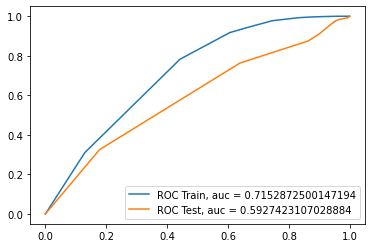

In [56]:
# 11. Finding the best parameters and fit the model by plotting ROC-AUC curve(using predict proba method)
bestclf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
bestclf.fit(X_tr, Y_train)

#predicting the test and train dataset
Y_trainpred = bestclf.predict_proba(X_tr)[:,1]
Y_testpred = bestclf.predict_proba(X_te)[:,1]

print(Y_trainpred)

#importing libraries and calculating fp,tp and threshold using roc_curve
from sklearn.metrics import roc_curve, auc
fp_train, tp_train, threshold_train = roc_curve(Y_train, Y_trainpred, drop_intermediate = False)
fp_test, tp_test, threshold_test = roc_curve(Y_test, Y_testpred, drop_intermediate = False)

#calculating auc: X-axis = fpr, Y-axis: tpr
train_auc1 = auc(fp_train, tp_train)
test_auc1 = auc(fp_test, tp_test)

#plotting the curves
plt.plot(fp_train, tp_train, label = "ROC Train, auc = "+str(train_auc1))
plt.plot(fp_test, tp_test, label = "ROC Test, auc = "+str(test_auc1))
plt.legend()
plt.show()


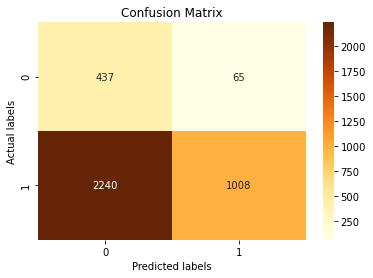

In [57]:
# 11. Ploting confusion matrix based on best threshold value
#calculating maximum threshold value
import numpy
maxthreshval = float(threshold_train[numpy.argmax(tp_train*(1-fp_train))])

#determining classvalues based on the probability scores crossing the thresholdvalue

bestprob_train = [1 if x > maxthreshval else 0 for x in Y_trainpred]
bestprob_test = [ 1 if x > maxthreshval else 0 for x in Y_testpred]


#importing data libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#creating confusion matrix
cm_train = confusion_matrix(Y_train, bestprob_train)
cm_test = confusion_matrix(Y_test, bestprob_test)

#creating a heat based confusion matrix. Code obtained from: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
ax = plt.subplot();
sns.heatmap(cm_train, annot=True,fmt="d",cmap='YlOrBr')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

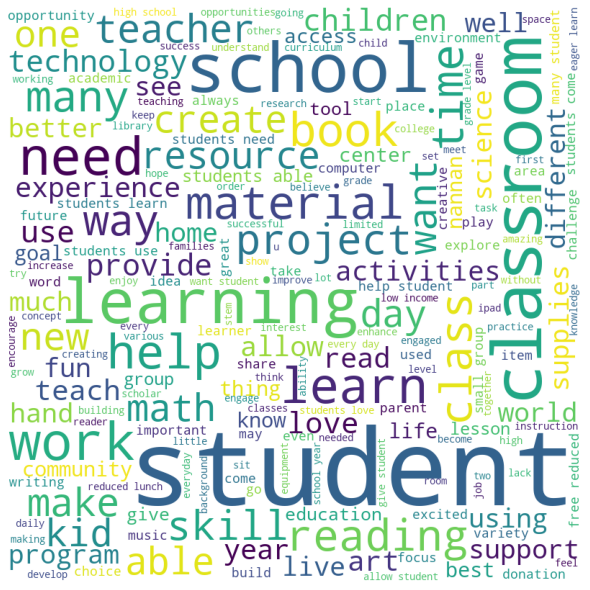

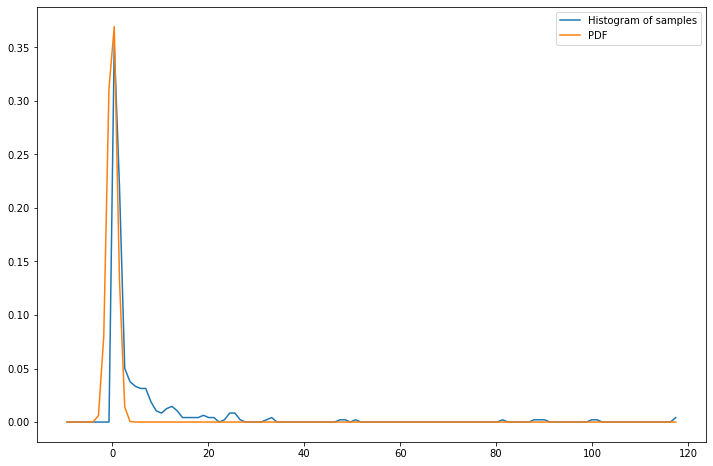

/Users/rathish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

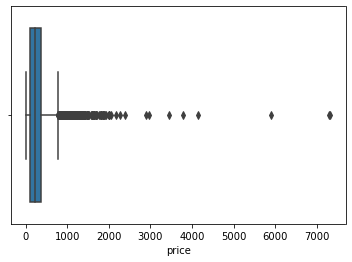

In [58]:
# 12. Finding all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
totbestprob = list(bestprob_train)

listoffalsepositives = [1 if (totbestprob[x] == 1 & list(Y_train)[x] == 0) else 0 for x in range(len(Y_train))]
wordclouddata = pandas.DataFrame({'essay':X_train['essay'], "listoffalsepositives":listoffalsepositives, "teachernumberpreviouslypostedproj":X_train['teacher_number_of_previously_posted_projects'], "price":X_train['price']})
wordclouddata = wordclouddata[wordclouddata['listoffalsepositives'] == 1]

#generating word cloud: code taken from - https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in wordclouddata['essay'].values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
#ploting the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#plotting the pdf

import numpy as np

# Sample from a normal distribution using numpy's random number generator
samples = wordclouddata['teachernumberpreviouslypostedproj']

# Compute a histogram of the sample (taken from https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)
bins = np.linspace(-10,wordclouddata['teachernumberpreviouslypostedproj'].max() , wordclouddata['teachernumberpreviouslypostedproj'].max())
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

#plotting box plot for false-positives data
import seaborn as sns
sns.boxplot(X_train['price'])

## Observations made from wordcloud and PDF plot
1. "Student", "classroom", "school" and "learning" are some of the top words that were used extensively in the essays of false positive data. 
2. teacher_number_of_previously_posted_projects  < 5  have the highest chances of being in the false positive data.
3. Mean price ~ 200 dollars has the highest changes of being in the false positive data. 
4. Price <900 dollars has the most number of false positive data. 


#### Performing the above steps for SET 2: 

In [60]:
# 9. Performing hyperparameter tuning and plot either heatmap or 3d plot.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import SCORERS
from sklearn.metrics import roc_auc_score

params_distribution = {'max_depth': [1, 3, 10, 30] , 'min_samples_split' : [5, 10, 100, 500]}
randomsearchcv = RandomizedSearchCV(DecisionTreeClassifier(), params_distribution, cv = 10, return_train_score=True, scoring = 'roc_auc', n_iter = 16, n_jobs = -1)
randomsearchcv.fit(X_TR, Y_train)


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=16,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 10, 30],
                                        'min_samples_split': [5, 10, 100, 500]},
                   return_train_score=True, scoring='roc_auc')

In [61]:
#gathering results
results = pandas.DataFrame.from_dict(randomsearchcv.cv_results_)
results = results.sort_values(by = ['param_min_samples_split', 'param_max_depth'])

train_auc = results['mean_train_score'].tolist()
train_auc_std = results['std_train_score'].tolist()
test_auc = results['mean_test_score'].tolist()
test_auc_std = results['std_test_score'].tolist()

min_samples_split = results['param_min_samples_split'].tolist()
max_depth = results['param_max_depth'].tolist()

#plotting the 3-D plot
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt

#code to plot 3-D plot obtained from - https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=min_samples_split, y=max_depth, z=train_auc, name = 'Train')
trace2 = go.Scatter3d(x=min_samples_split, y=max_depth, z=test_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

Based on the above 3d graph, the max_depth = 10 and min_samples_split = 500

[0.83943662 0.92419825 0.83943662 ... 0.94083601 0.85185185 0.94083601]


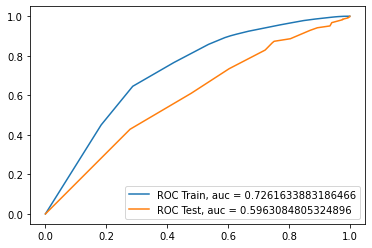

In [62]:
# 10. Finding the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
bestclf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
bestclf.fit(X_TR, Y_train)

#predicting the test and train dataset
Y_trainpred = bestclf.predict_proba(X_TR)[:,1]
Y_testpred = bestclf.predict_proba(X_TE)[:,1]

print(Y_trainpred)

#importing libraries and calculating fp,tp and threshold using roc_curve
from sklearn.metrics import roc_curve, auc
fp_train, tp_train, threshold_train = roc_curve(Y_train, Y_trainpred, drop_intermediate = False)
fp_test, tp_test, threshold_test = roc_curve(Y_test, Y_testpred, drop_intermediate = False)

#calculating auc: X-axis = fpr, Y-axis: tpr
train_auc_ = auc(fp_train, tp_train)
test_auc_ = auc(fp_test, tp_test)

#plotting the curves
plt.plot(fp_train, tp_train, label = "ROC Train, auc = "+str(train_auc_))
plt.plot(fp_test, tp_test, label = "ROC Test, auc = "+str(test_auc_))
plt.legend()
plt.show()


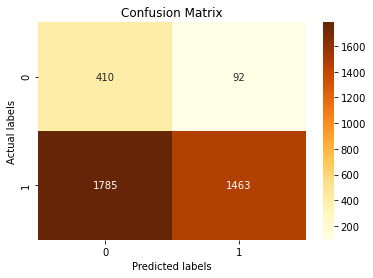

In [63]:
# 11. Plotting confusion matrix based on best threshold value
#calculating maximum threshold value
import numpy
maxthreshval = float(threshold_train[numpy.argmax(tp_train*(1-fp_train))])

#determining classvalues based on the probability scores crossing the thresholdvalue

bestprob_train = [1 if x > maxthreshval else 0 for x in Y_trainpred]
bestprob_test = [ 1 if x > maxthreshval else 0 for x in Y_testpred]


#importing data libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#creating confusion matrix
cm_train = confusion_matrix(Y_train, bestprob_train)
cm_test = confusion_matrix(Y_test, bestprob_test)

#creating a heat based confusion matrix. Code obtained from: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
ax = plt.subplot();
sns.heatmap(cm_train, annot=True,fmt="d",cmap='YlOrBr')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);



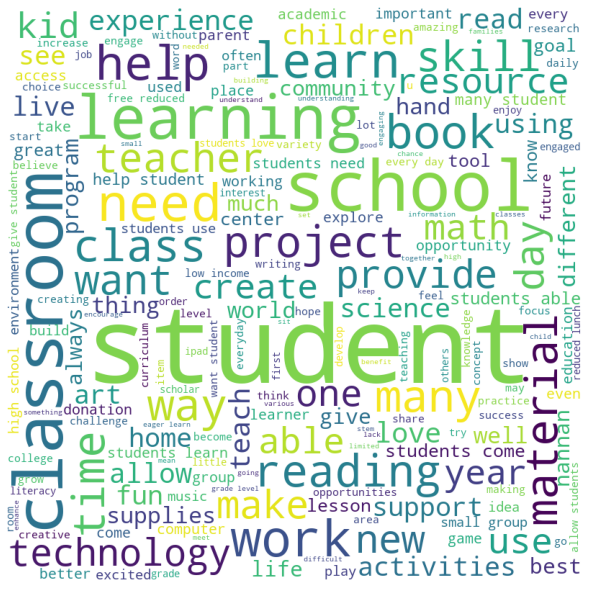

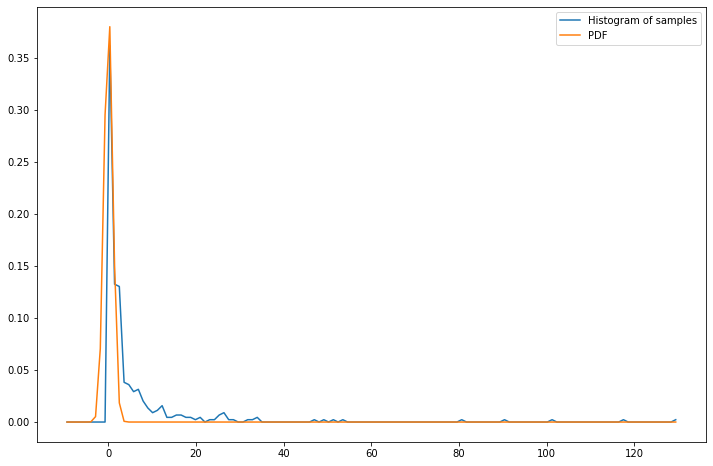

/Users/rathish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

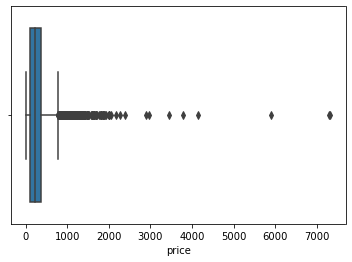

In [64]:
# 12. Finding all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
totbestprob = list(bestprob_train)

listoffalsepositives = [1 if (totbestprob[x] == 1 & list(Y_train)[x] == 0) else 0 for x in range(len(Y_train))]
wordclouddata = pandas.DataFrame({'essay':X_train['essay'], "listoffalsepositives":listoffalsepositives, "teachernumberpreviouslypostedproj":X_train['teacher_number_of_previously_posted_projects'], "price":X_train['price']})
wordclouddata = wordclouddata[wordclouddata['listoffalsepositives'] == 1]

#generating word cloud: code taken from - https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in wordclouddata['essay'].values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
#ploting the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#plotting the pdf

import numpy as np

# Sample from a normal distribution using numpy's random number generator
samples = wordclouddata['teachernumberpreviouslypostedproj']

# Compute a histogram of the sample
bins = np.linspace(-10,wordclouddata['teachernumberpreviouslypostedproj'].max() , wordclouddata['teachernumberpreviouslypostedproj'].max())
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

#plotting box plot for false-positives data
import seaborn as sns
sns.boxplot(X_train['price'])

# Task - 2

In [65]:
#setting up the classifier for set 1 data
bestclf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
bestclf.fit(X_tr, Y_train)

featimplist = bestclf.feature_importances_.tolist()


In [66]:
#creating list containing the index number for columns where featimportance != 0
zerofeatimplist = []

for val in featimplist:
    if val != 0:
        zerofeatimplist.append(featimplist.index(val))

X_trf = np.empty((np.shape(X_tr)[0],1))
X_tef = np.empty((np.shape(X_te)[0],1))

#getting columns with column index X_tr
for eachval in zerofeatimplist:
    X_trf = np.hstack((X_trf, X_tr.getcol(eachval).toarray()))
    X_tef = np.hstack((X_tef, X_te.getcol(eachval).toarray()))
    
np.nan_to_num(X_trf)
np.nan_to_num(X_tef)

array([[ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         8.24716641e-002,  0.00000000e+000,  1.30041105e-002],
       [-8.78166209e+088,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  5.08213517e-002],
       [ 6.93274671e-310,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  9.56208671e-003],
       ...,
       [-2.47080000e-001,  0.00000000e+000,  0.00000000e+000, ...,
         4.91673594e-002,  0.00000000e+000,  6.11556087e-002],
       [ 1.87530000e-001,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  3.86180609e-002],
       [-2.14780000e-001,  0.00000000e+000,  6.74418567e-002, ...,
         0.00000000e+000,  0.00000000e+000,  5.55280430e-002]])

    mean_fit_time  std_fit_time  mean_score_time  std_score_time     param_C  \
0        0.622580      0.714646         0.004728        0.002267       0.001   
1        0.061252      0.013559         0.004947        0.002957    0.001778   
2        0.068562      0.017399         0.005039        0.002401    0.003162   
3        0.075584      0.017668         0.003858        0.001615    0.005623   
4        0.081539      0.023903         0.003550        0.000559        0.01   
5        0.076546      0.020582         0.003938        0.001757    0.017783   
6        0.076044      0.016313         0.003851        0.001013    0.031623   
7        0.082773      0.021986         0.003885        0.000878    0.056234   
8        0.088631      0.020845         0.003603        0.000613         0.1   
9        0.105130      0.022903         0.003891        0.001324    0.177828   
10       0.110549      0.027452         0.003270        0.000656    0.316228   
11       0.120655      0.027624         

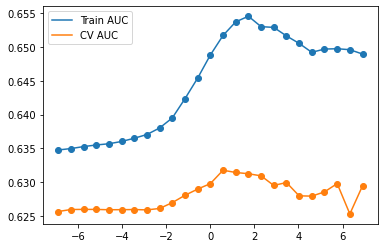

In [67]:
#running the randomizedsearcCV for identifying the best hyperparameters for data with logistic regression
#importing librarries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import math

#setting parameters
c = np.logspace(-3, 3, 25)
params_distribution = {'C' : c}
gridsearchcv = GridSearchCV(LogisticRegression(), params_distribution, cv = 10, return_train_score=True, scoring = 'roc_auc', n_jobs = -1)
gridsearchcv.fit(X_trf, Y_train)

#gathering results
results = pandas.DataFrame.from_dict(gridsearchcv.cv_results_)
results = results.sort_values(by = ['param_C'])
train_auc = results['mean_train_score'].tolist()
train_auc_std = results['std_train_score'].tolist()
test_auc = results['mean_test_score'].tolist()
test_auc_std = results['std_test_score'].tolist()

print(results)
C_val = [math.log(x) for x in results['param_C']]
C_val.sort()

#plotting results
plt.plot(C_val, train_auc, label = "Train AUC")
plt.scatter(C_val, train_auc)
plt.plot(C_val, test_auc, label = "CV AUC")
plt.scatter(C_val, test_auc)
plt.legend()
plt.plot()

print(C_val)

/Users/rathish/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



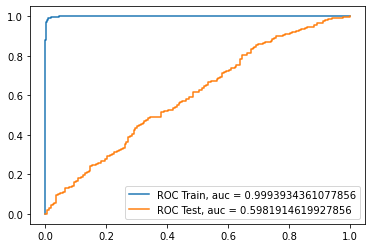

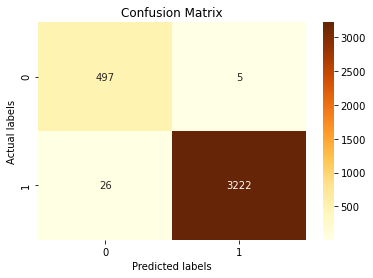

In [68]:
#The best value of log(C) = 1.151292546497023
best_C = 10**1.151292546497023
bestlogisticregression = LogisticRegression(C = best_C)

#fiting train dataset
bestlogisticregression.fit(X_tr, Y_train)

#predicting the test and train dataset
Y_testpredfeatures = bestlogisticregression.predict_proba(X_te)[:,1]
Y_trainpredfeatures = bestlogisticregression.predict_proba(X_tr)[:,1]

#importing libraries and calculating fp,tp and threshold using roc_curve
from sklearn.metrics import roc_curve, auc
fp_train, tp_train, threshold_train = roc_curve(Y_train, Y_trainpredfeatures, drop_intermediate = True)
fp_test, tp_test, threshold_test = roc_curve(Y_test, Y_testpredfeatures, drop_intermediate = True)

#calculating auc: X-axis = fpr, Y-axis: tpr
train_aucbest = auc(fp_train, tp_train)
test_aucbest = auc(fp_test, tp_test)

#plotting the curves
plt.plot(fp_train, tp_train, label = "ROC Train, auc = "+str(train_aucbest))
plt.plot(fp_test, tp_test, label = "ROC Test, auc = "+str(test_aucbest))
plt.legend()
plt.show()

# 11. Plot confusion matrix based on best threshold value
#calculating maximum threshold value
import numpy
maxthreshval = float(threshold_train[numpy.argmax(tp_train*(1-fp_train))])

#determining classvalues based on the probability scores crossing the thresholdvalue

bestprob_train = [1 if x > maxthreshval else 0 for x in Y_trainpredfeatures]
bestprob_test = [ 1 if x > maxthreshval else 0 for x in Y_testpredfeatures]


#importing data libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#creating confusion matrix
cm_train = confusion_matrix(Y_train, bestprob_train)

#creating a heat based confusion matrix. Code obtained from: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
ax = plt.subplot();
sns.heatmap(cm_train, annot=True,fmt="d",cmap='YlOrBr')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);


In [69]:
#Tables constructed using BeautifulTables python library: https://pypi.org/project/beautifultable/

from beautifultable import BeautifulTable

table = BeautifulTable()
table.columns.header = ["Vectorizer", "Model", "Hyperparameter", "Hyperparameter - max_depth", "Hyperparameter - min_sample_split ", "Hyperparameter - C", "AUC"]
table.rows.append(["TF-IDF", "Decision Tree", "RandomSearchCV", 10, 500, "NA", test_auc1])
table.rows.append(["TF-IDF - avg W2Vec", "Decision Tree", "RandomizedSearchCV", 10, 500, "NA", test_auc_ ])
table.rows.append(["TF-IDF", "Logistic Regression", "GridSearchCV", "NA", "NA", best_C, test_aucbest ])
print(table)


+---------+---------+---------+------------+-----------------+---------+-------+
| Vectori |  Model  | Hyperpa | Hyperparam | Hyperparameter  | Hyperpa |  AUC  |
|   zer   |         | rameter | eter - max | - min_sample_sp | rameter |       |
|         |         |         |   _depth   |      lit        |   - C   |       |
+---------+---------+---------+------------+-----------------+---------+-------+
| TF-IDF  | Decisio | RandomS |     10     |       500       |   NA    | 0.593 |
|         | n Tree  | earchCV |            |                 |         |       |
+---------+---------+---------+------------+-----------------+---------+-------+
| TF-IDF  | Decisio | Randomi |     10     |       500       |   NA    | 0.596 |
| - avg W | n Tree  | zedSear |            |                 |         |       |
|  2Vec   |         |  chCV   |            |                 |         |       |
+---------+---------+---------+------------+-----------------+---------+-------+
| TF-IDF  | Logisti | GridSe